In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=100
import pandas as pd
plt.rcParams['figure.figsize']=(12,10)

In [5]:
import seaborn as sns

In [27]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster,ward,dendrogram
from sklearn.metrics import pairwise_distances
from scipy.cluster import hierarchy

In [7]:
af=pd.read_csv('../../datasets/af_year_country.csv')

af=af.rename(columns={'Unnamed: 0':'country.value','Unnamed: 1':'date'})

mean_af=pd.DataFrame({'country':af['country.value'],'date':af.date,'mean_af':af.iloc[:,2:].mean(axis=1)})

mean_af_piv=mean_af.pivot(index='country',columns='date',values='mean_af')
mean_af_piv=mean_af_piv.dropna()

In [8]:
from statsmodels.stats.dist_dependence_measures import distance_correlation

In [22]:
prox_matrix=pairwise_distances(mean_af_piv.values,metric=distance_correlation)

In [24]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    return linkage_matrix

In [31]:
clustering=AgglomerativeClustering(n_clusters=None,affinity='precomputed',distance_threshold=10,linkage='average').fit(1-prox_matrix)

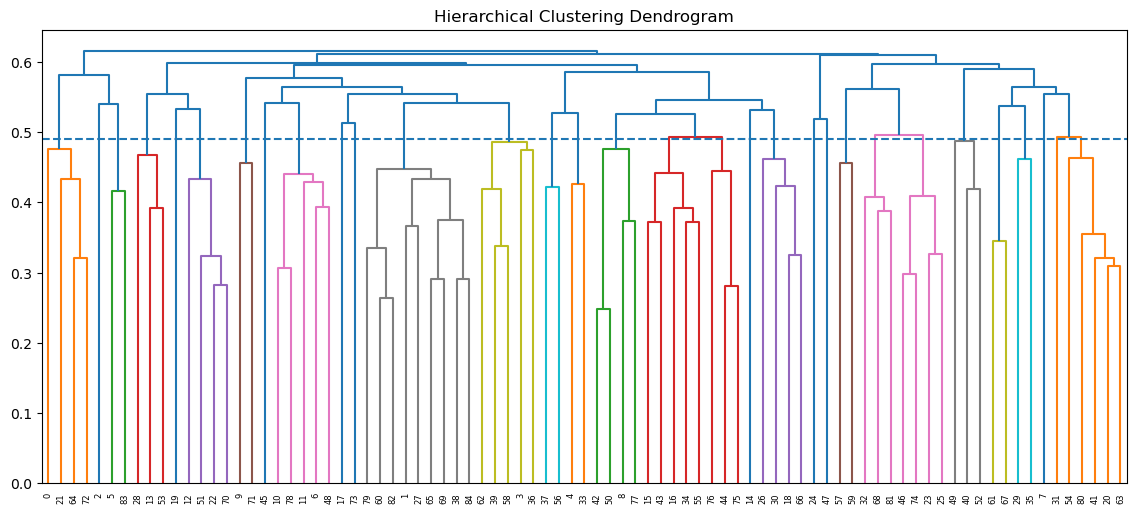

In [47]:
plt.figure(figsize = (14,6))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
Z = plot_dendrogram(clustering, p=5, color_threshold = .5)
plt.axhline(.49,linestyle='--')

In [48]:
# extract clusters from dendogram
clusters = fcluster(Z, .49, criterion='distance')
# create a lookup table for series in a given cluster
af_expr_piv_clustered = mean_af_piv.copy()
af_expr_piv_clustered["cluster"] = clusters

In [49]:
np.unique(clusters,return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       dtype=int32),
 array([4, 2, 1, 3, 4, 1, 2, 5, 1, 1, 1, 9, 5, 2, 2, 4, 5, 3, 4, 1, 1, 1,
        2, 3, 4, 3, 2, 2, 5, 1, 1]))

/home/emmanuel/miniconda3/envs/toughenv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


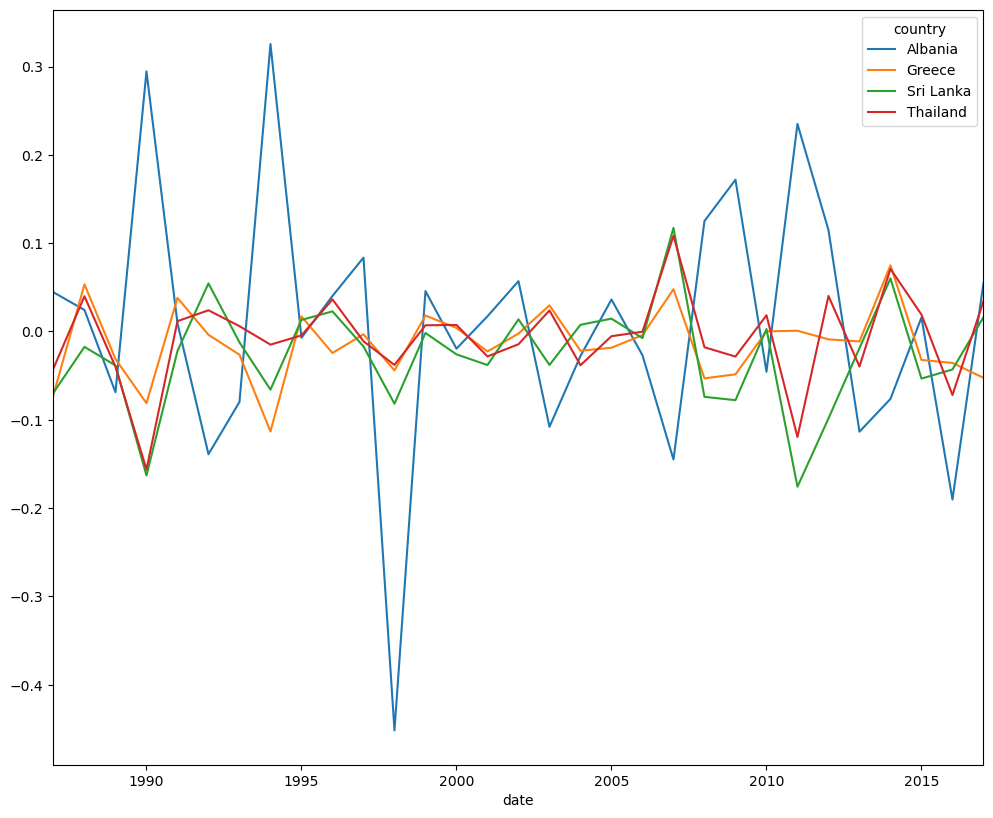

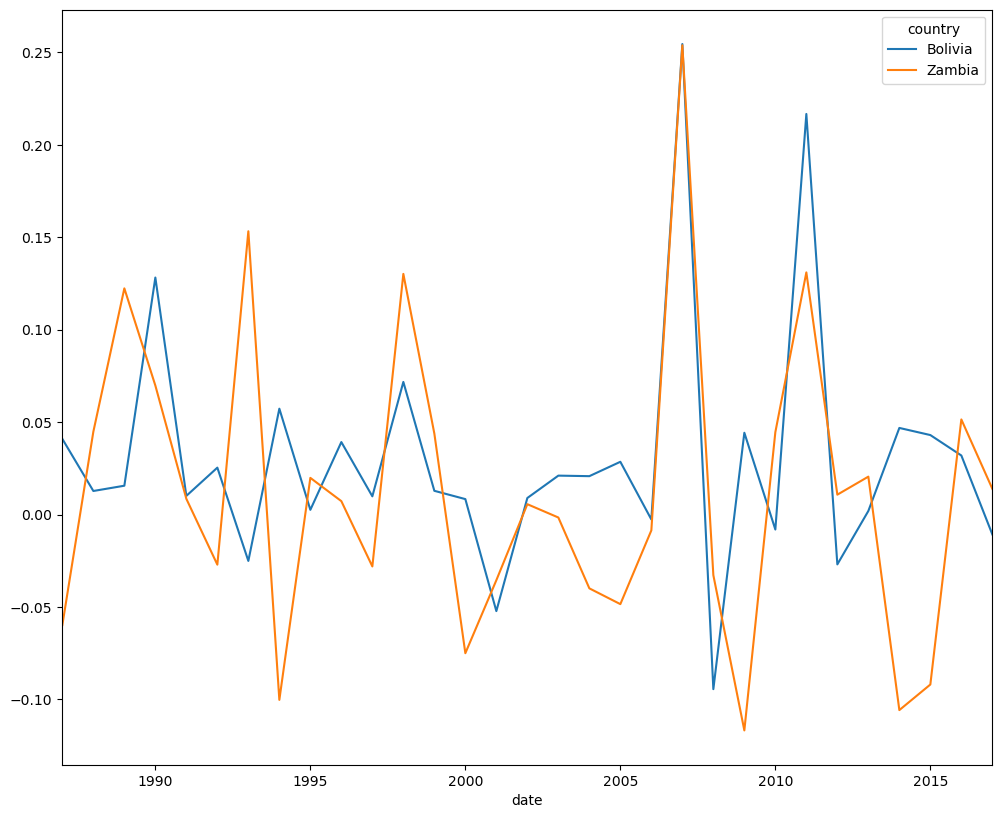

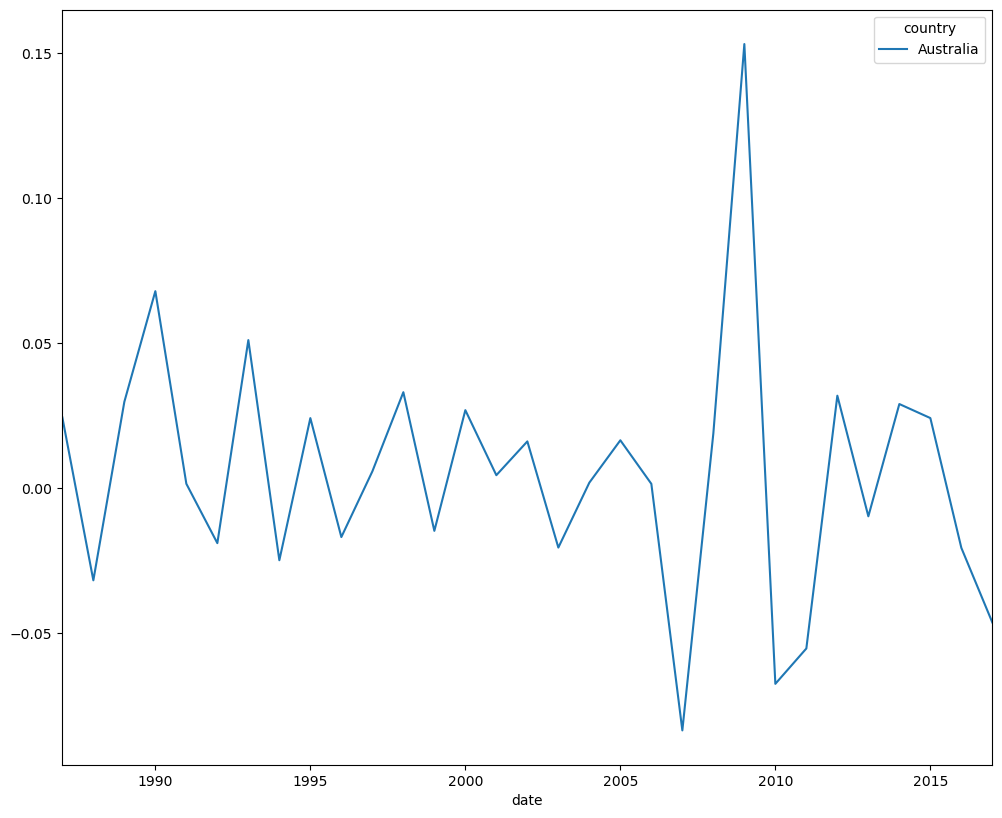

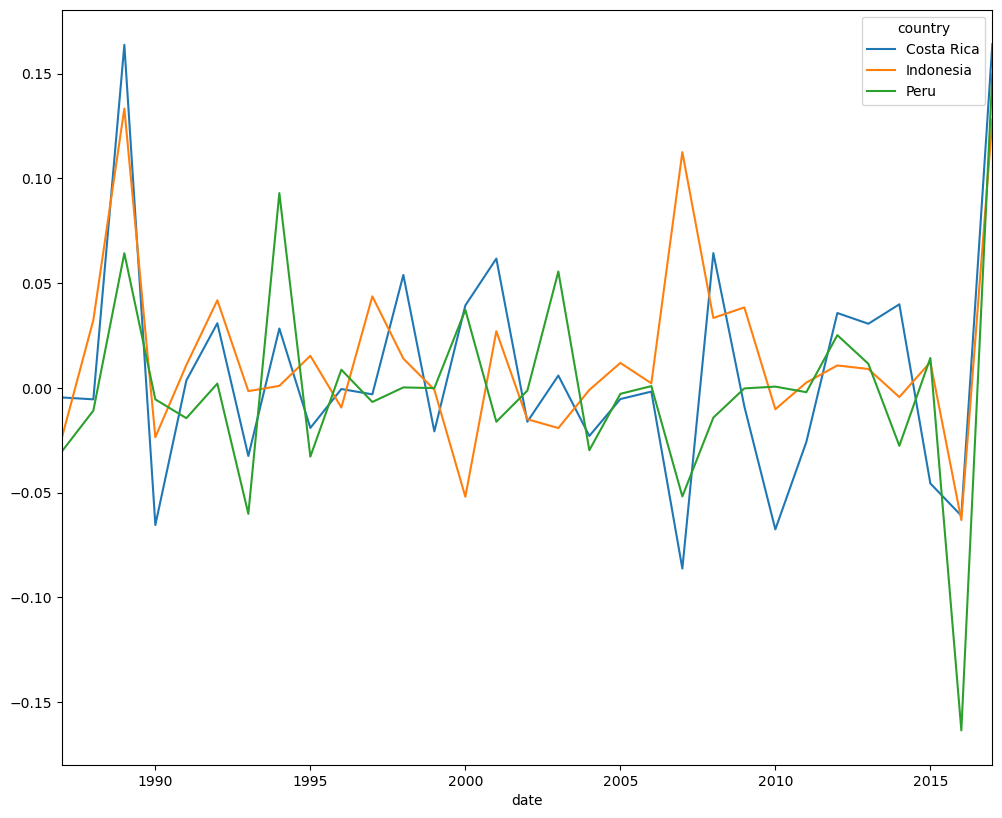

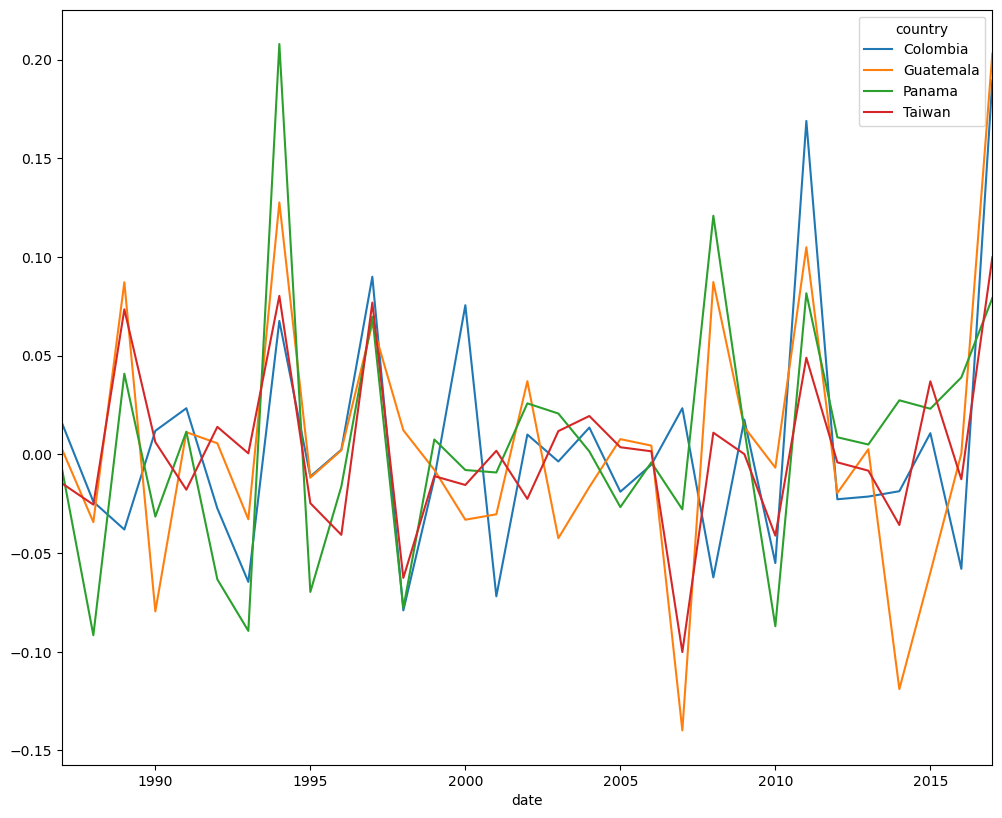

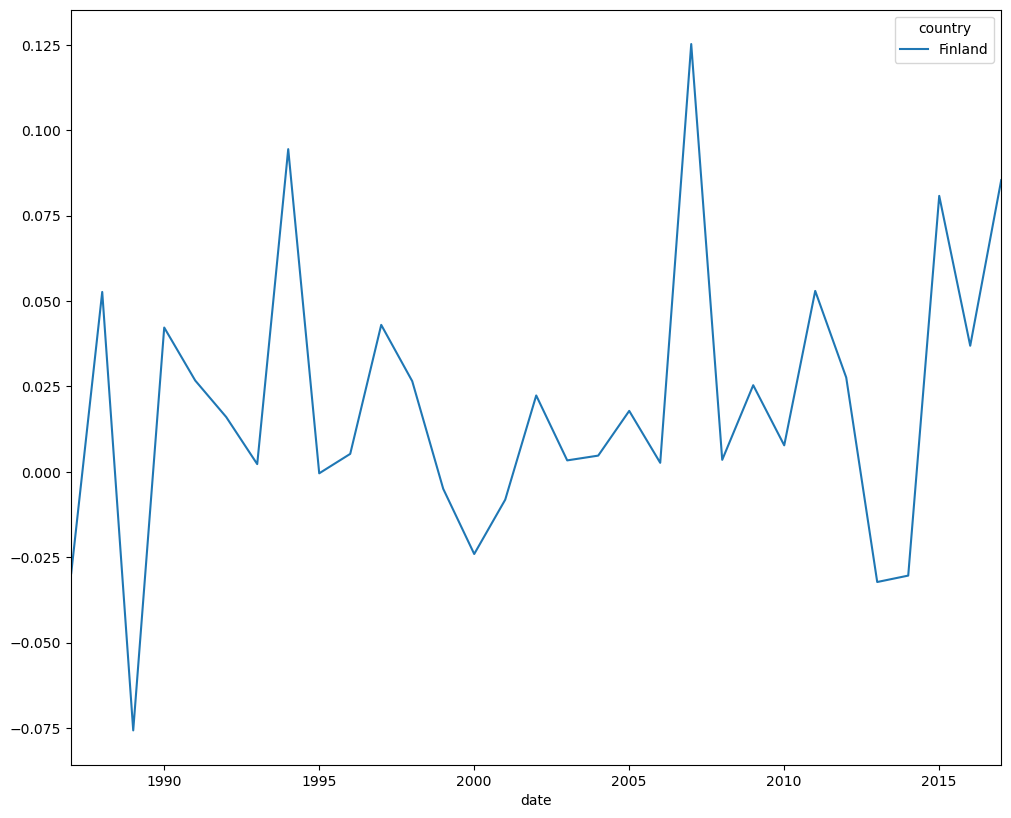

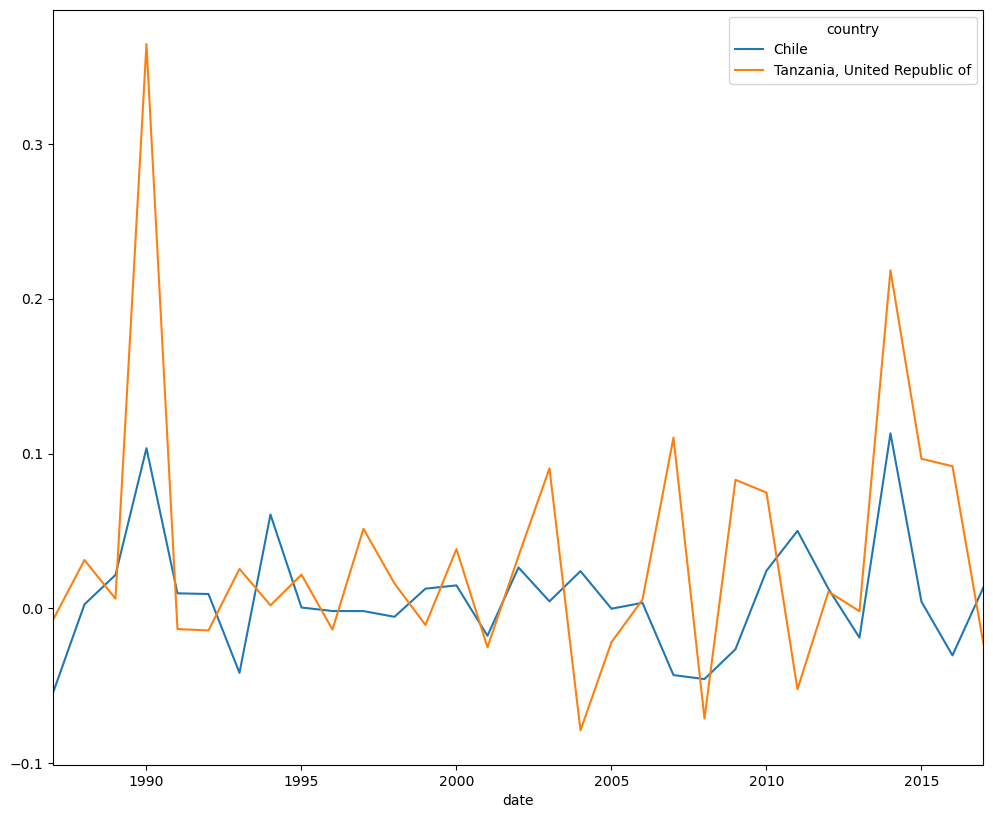

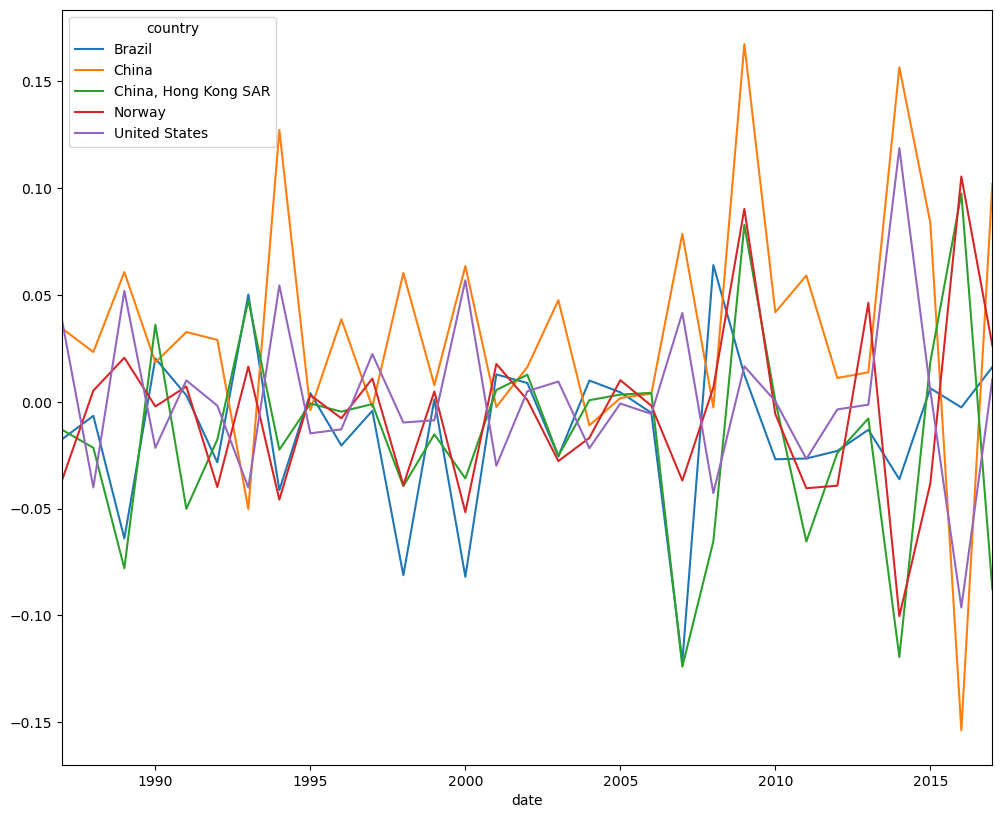

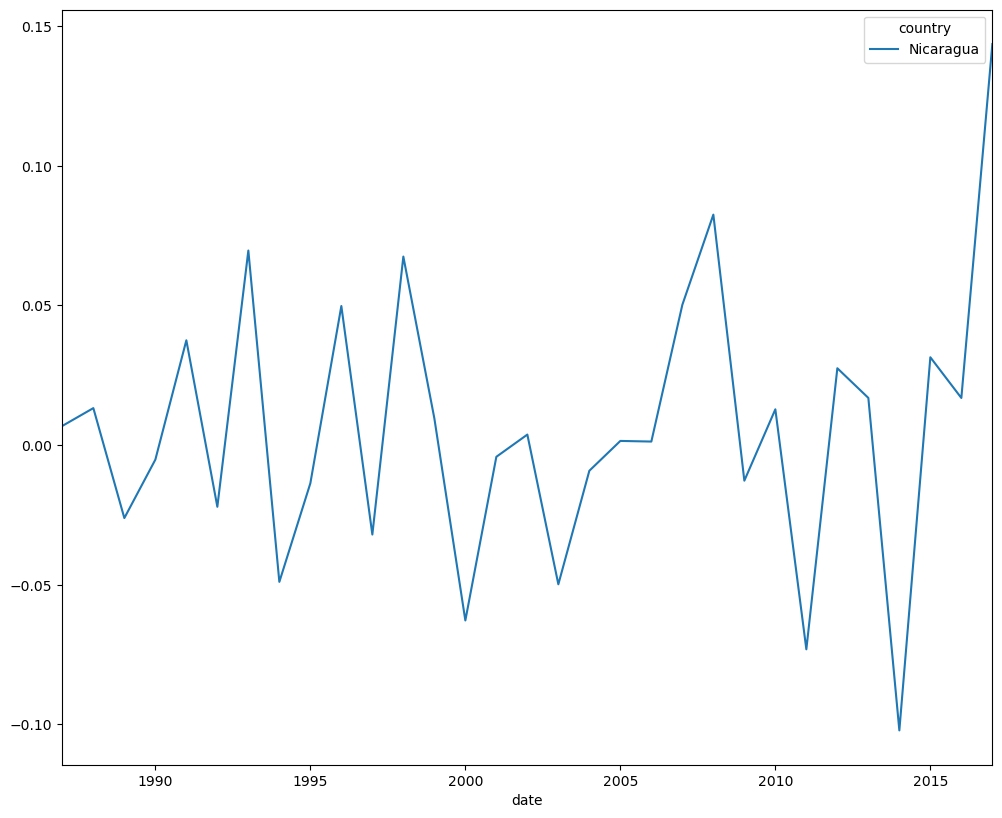

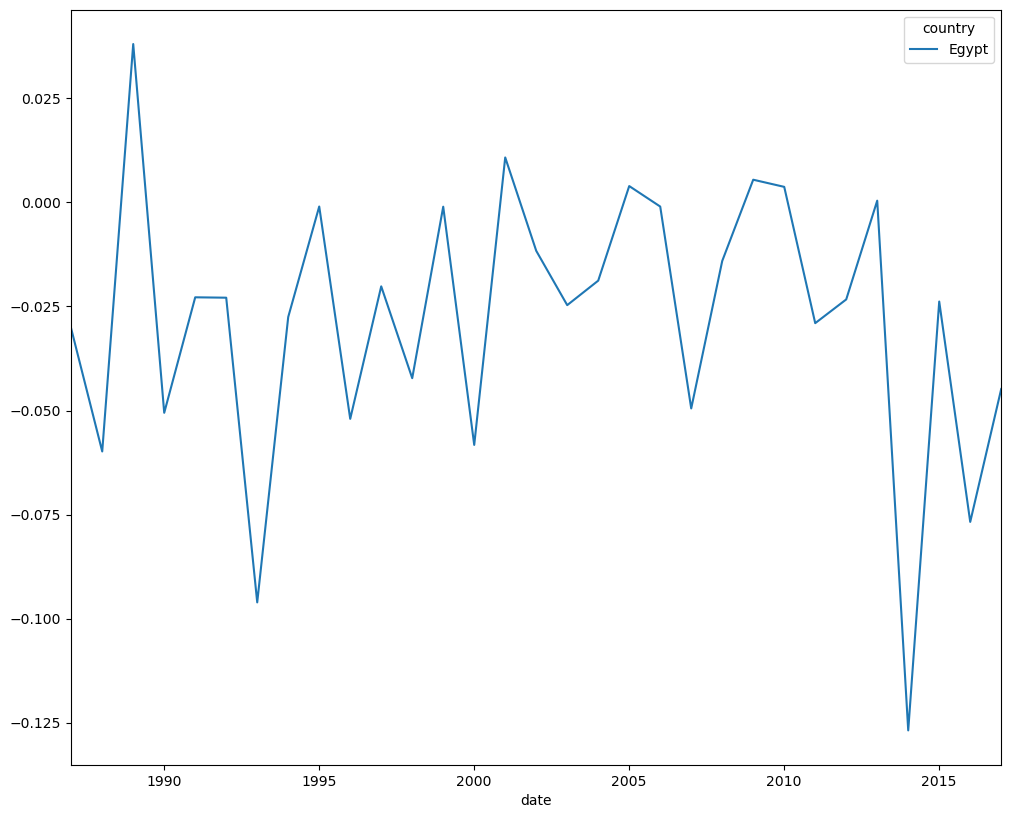

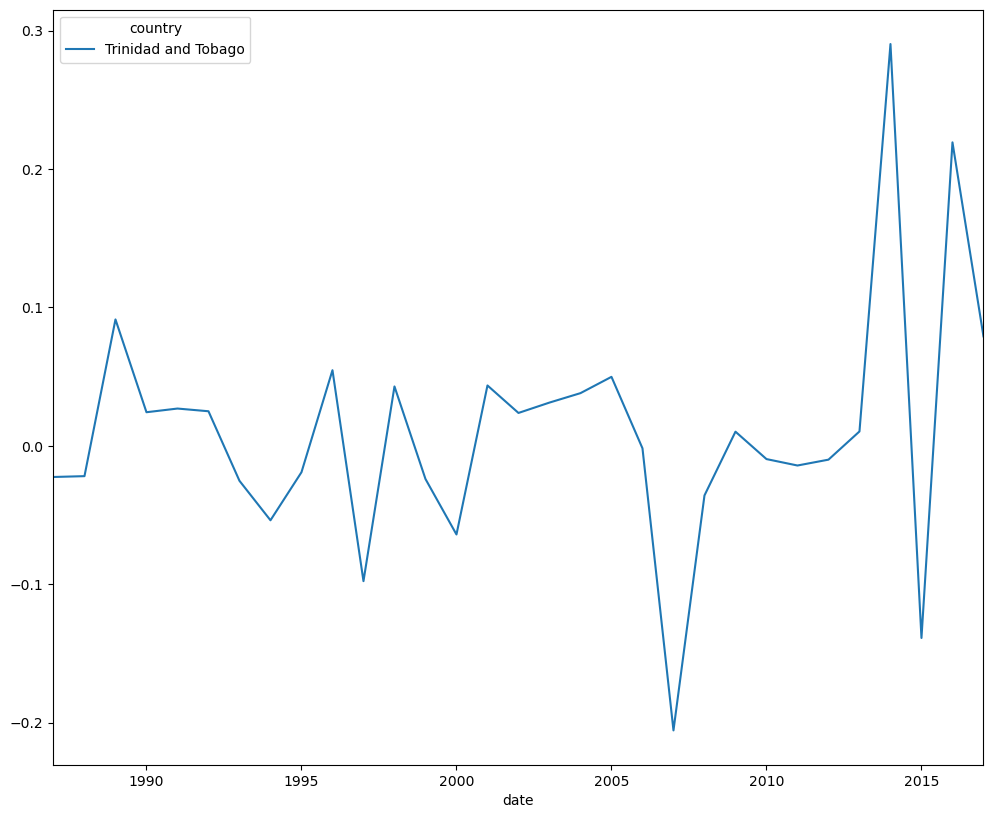

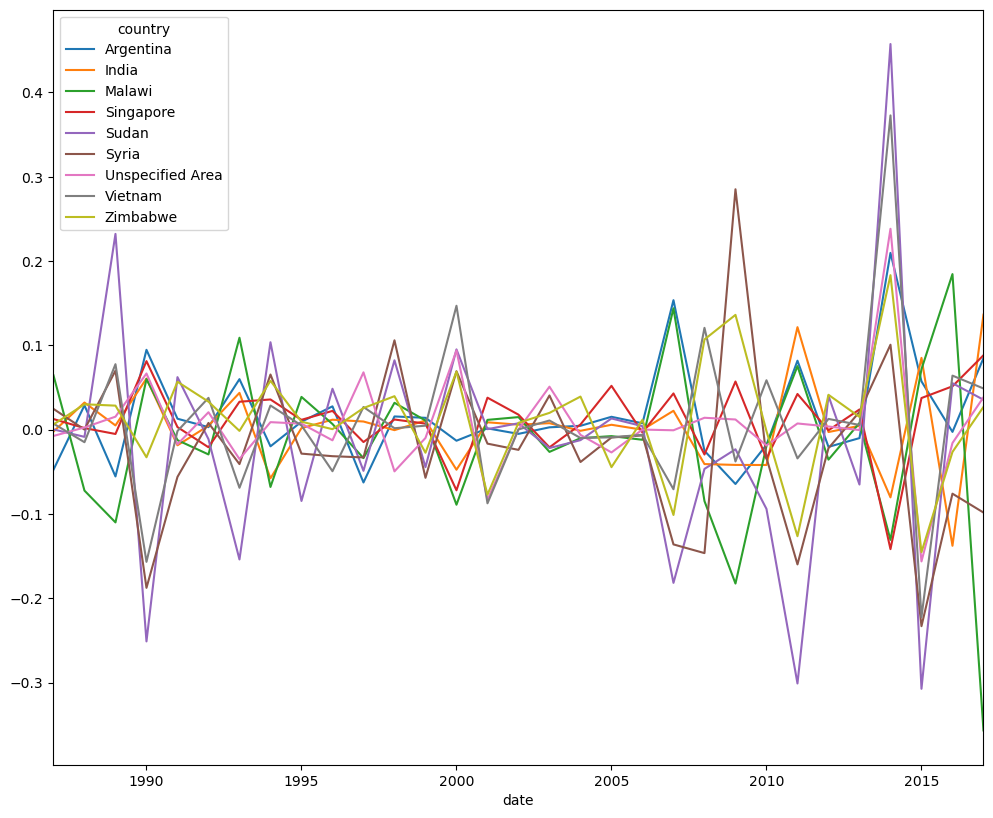

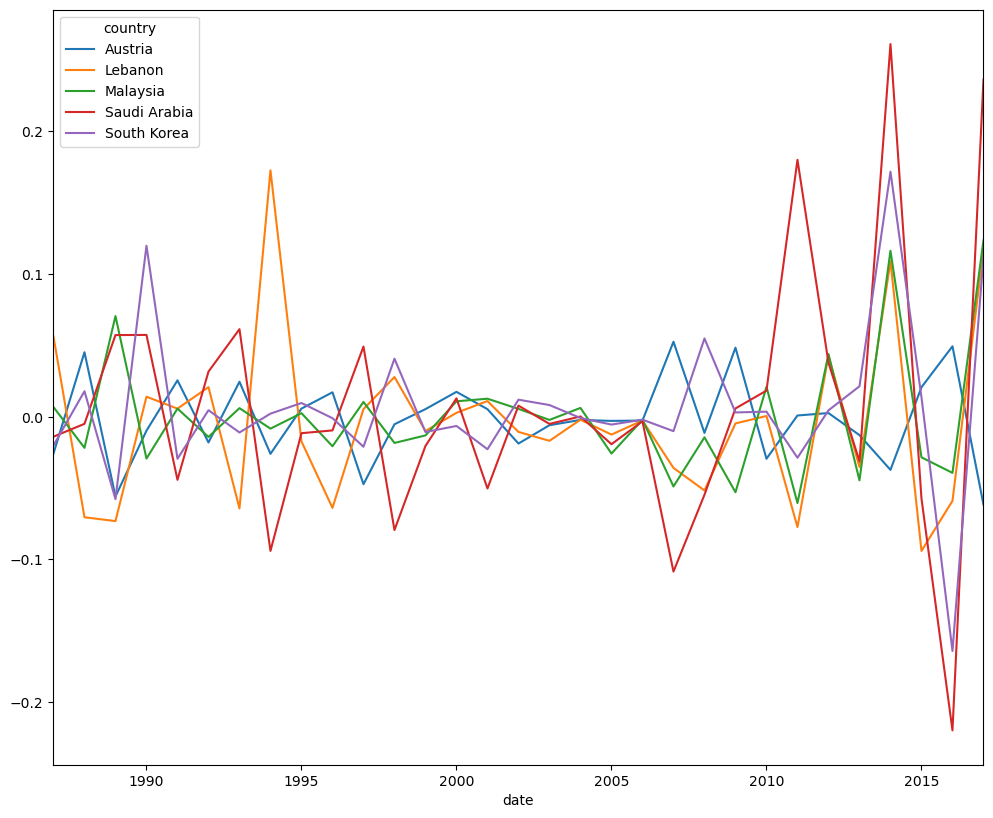

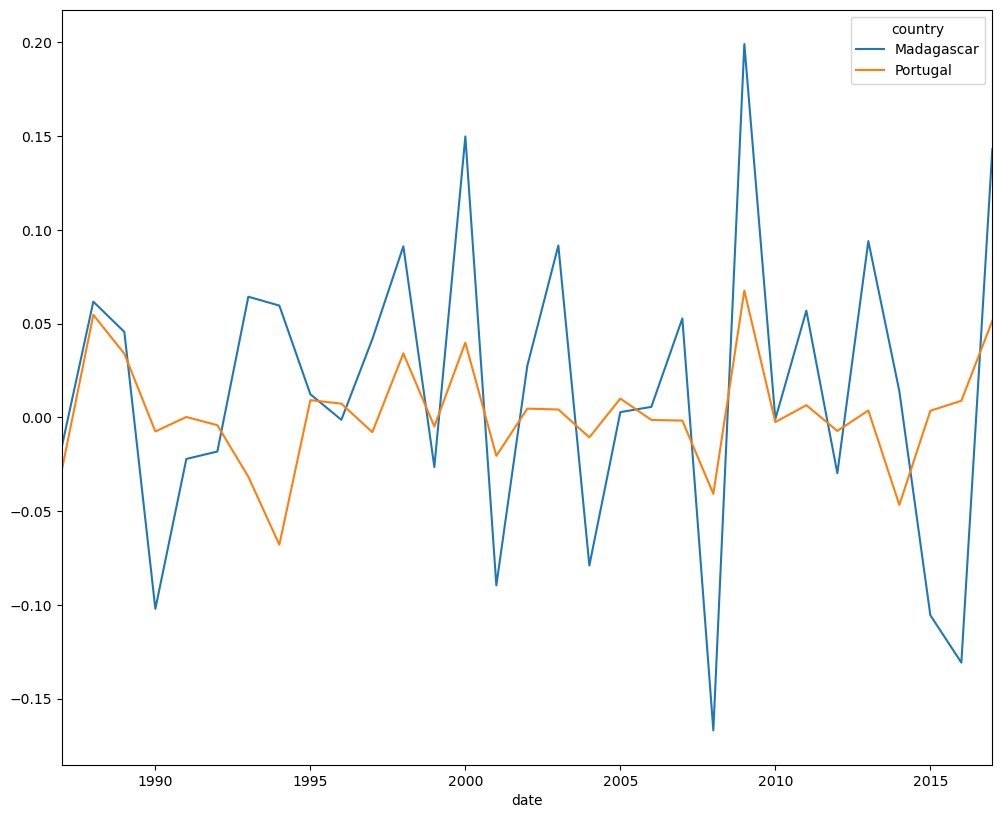

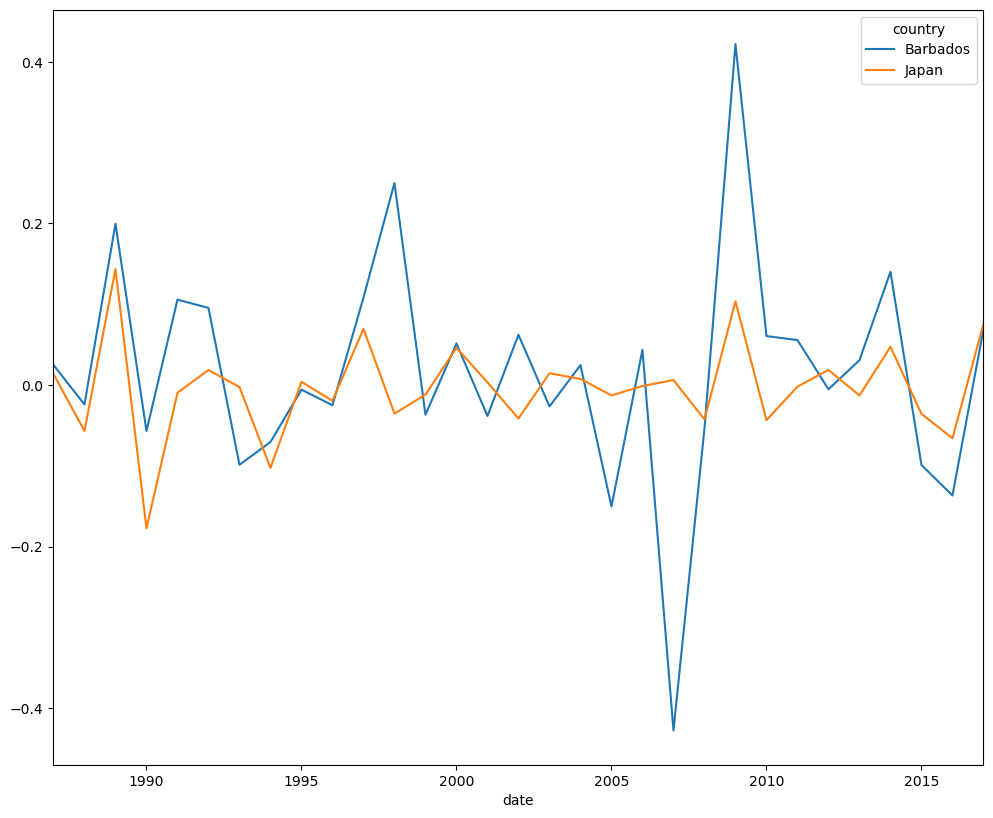

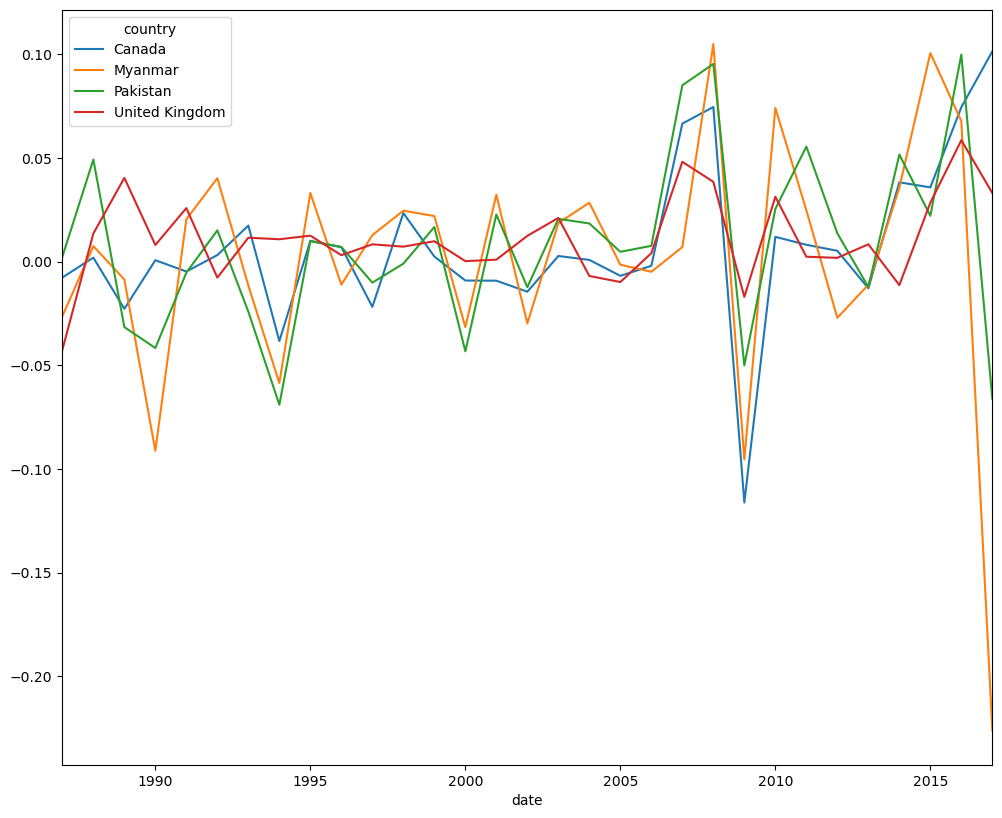

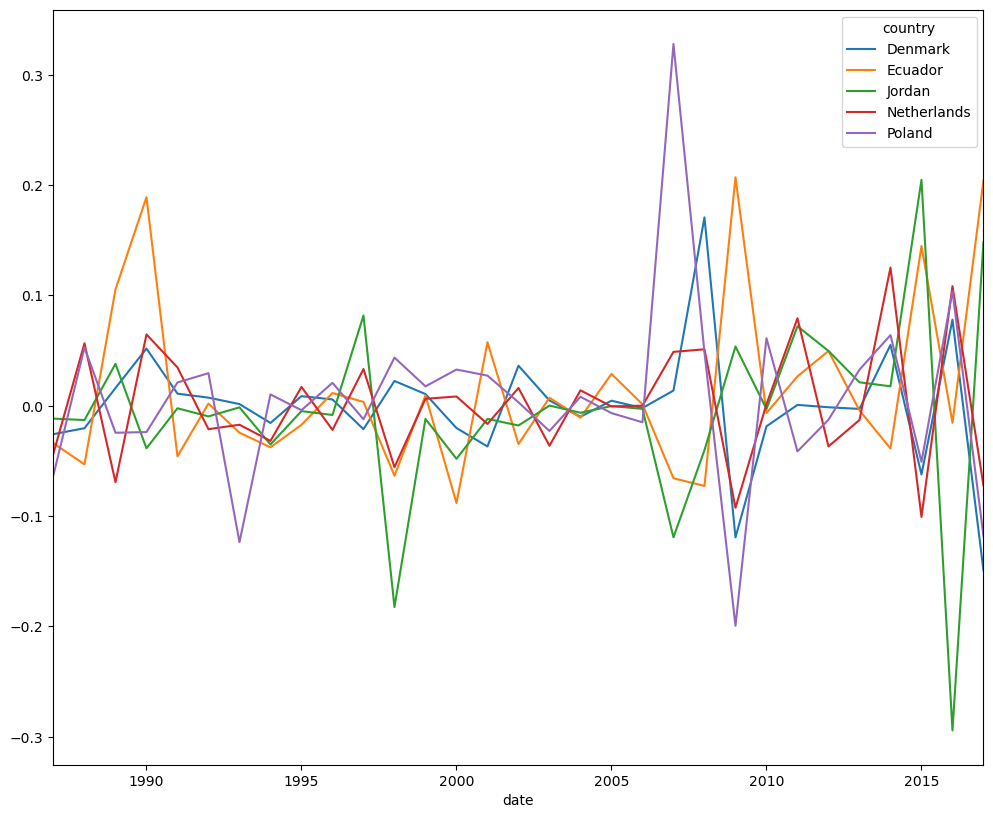

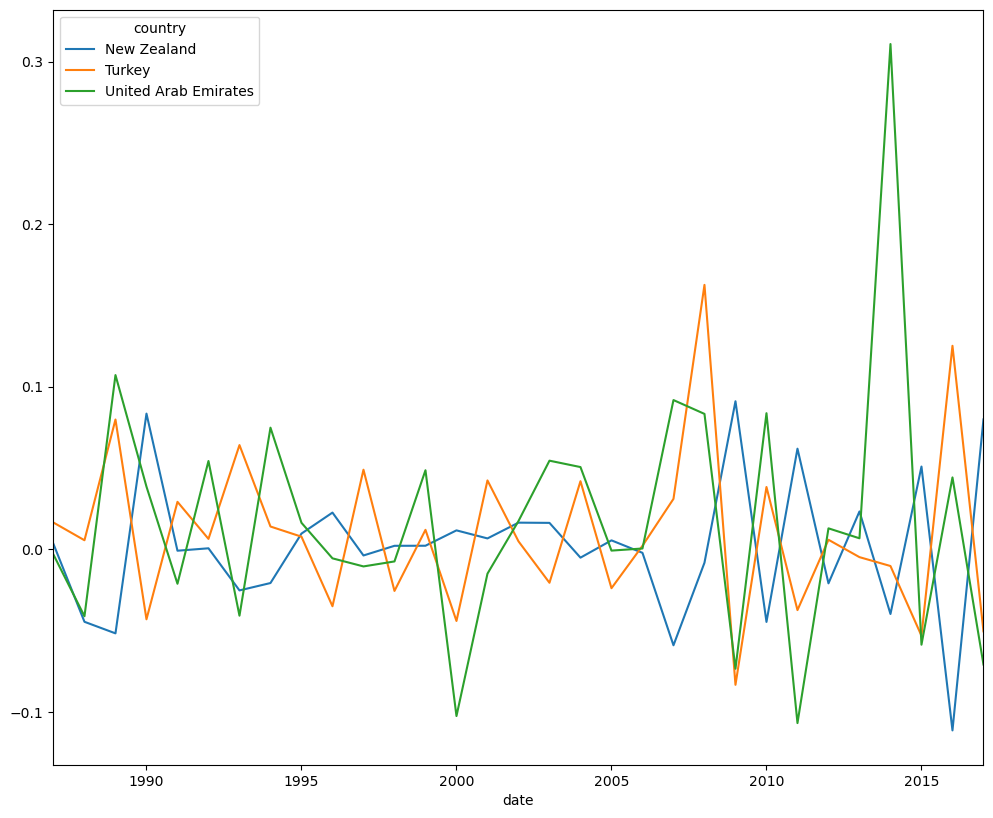

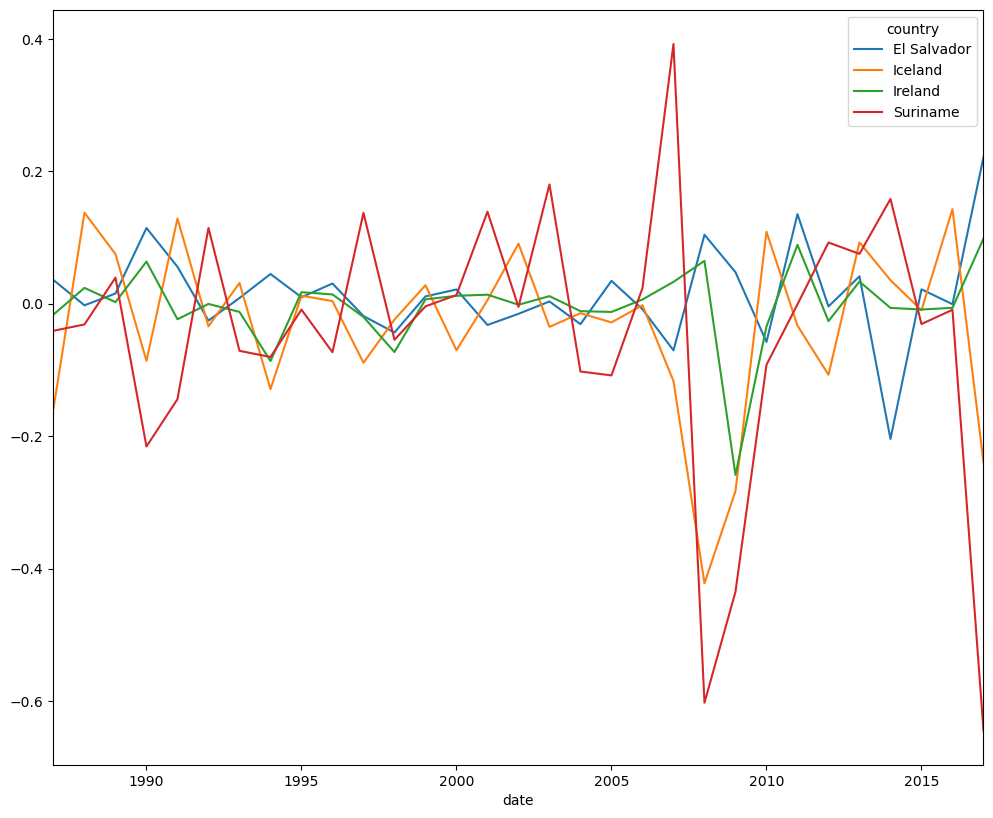

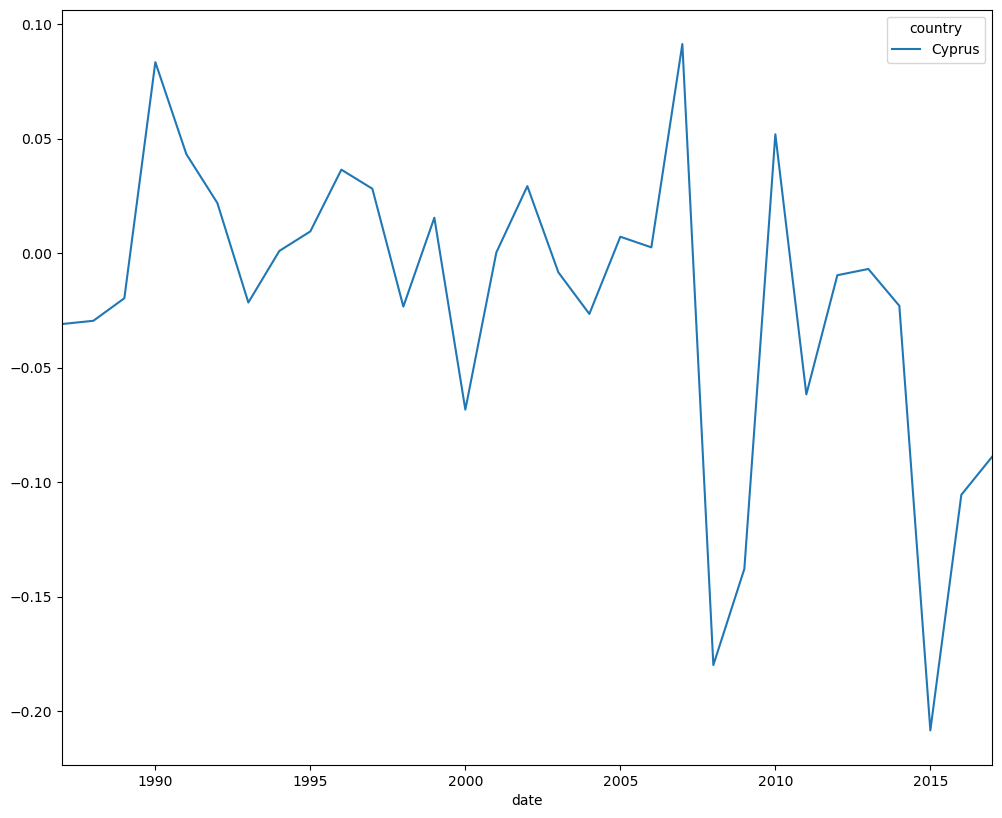

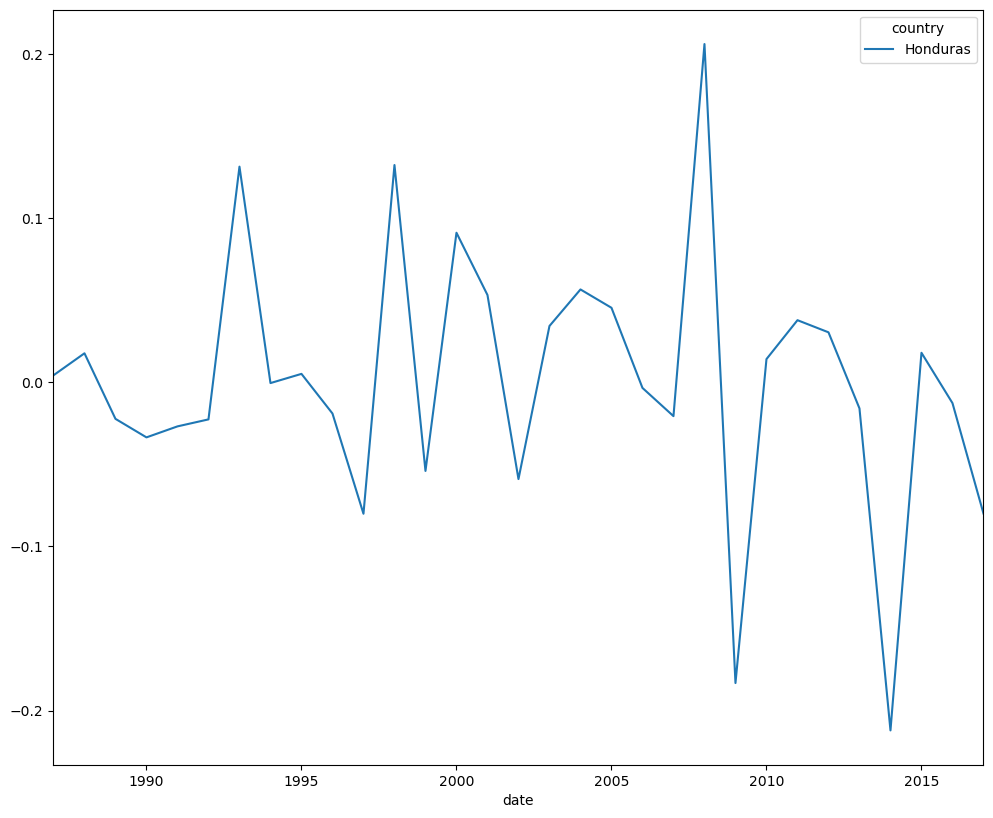

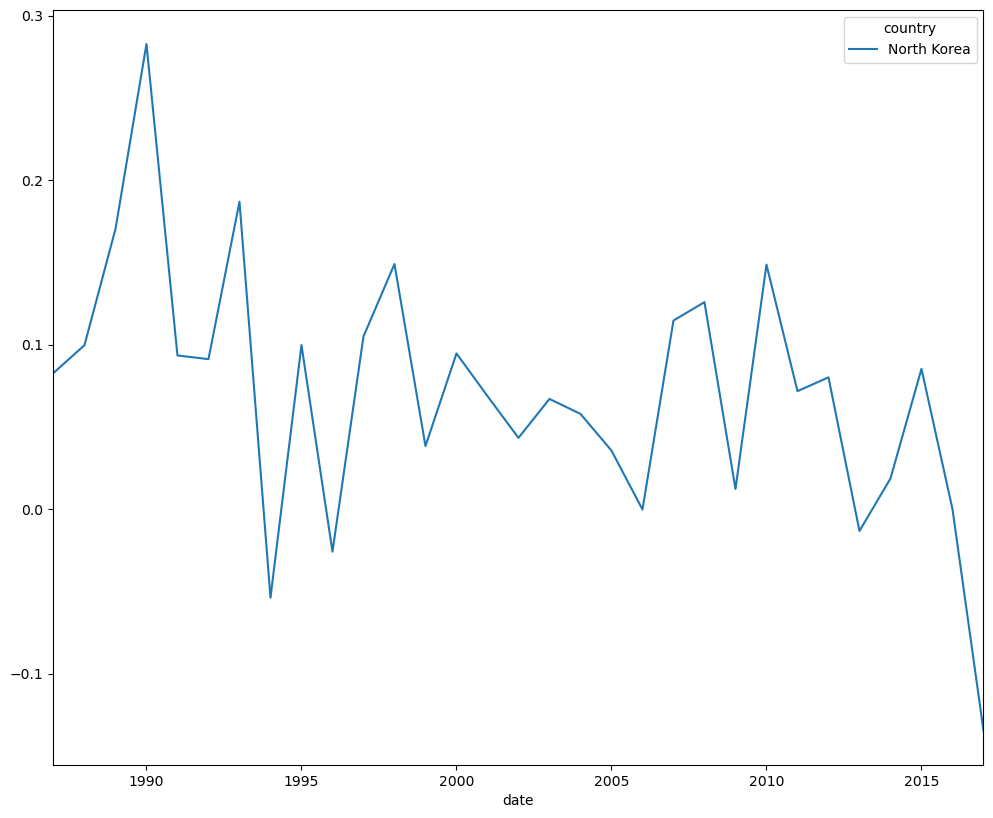

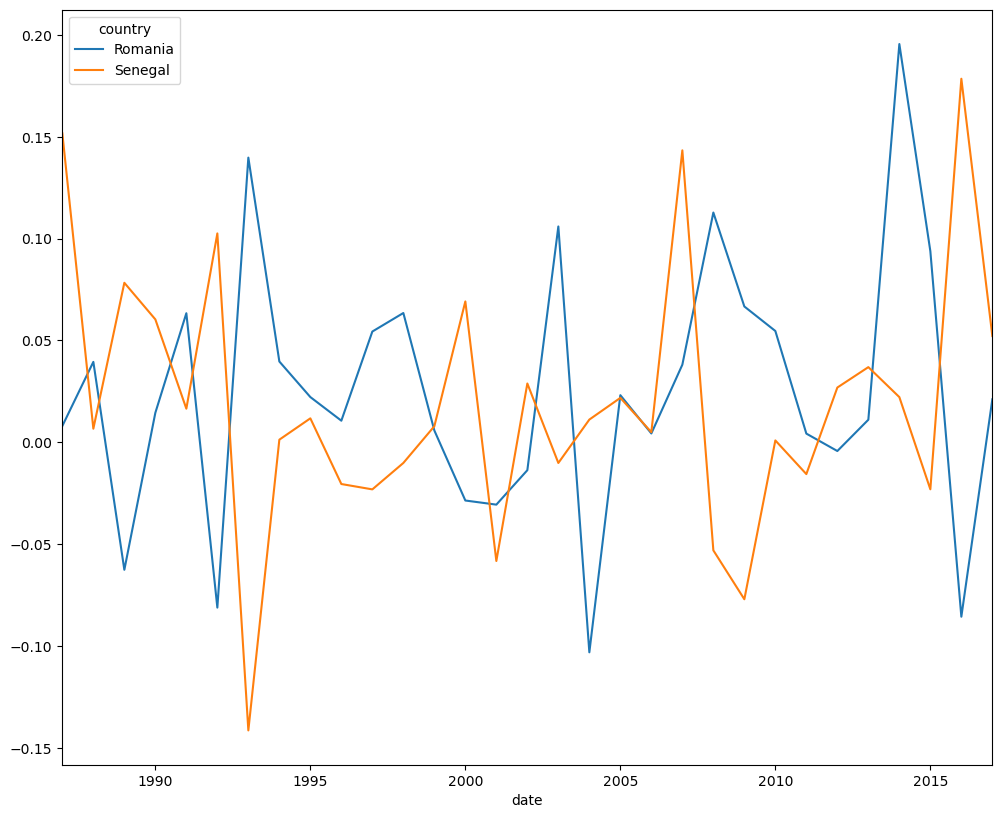

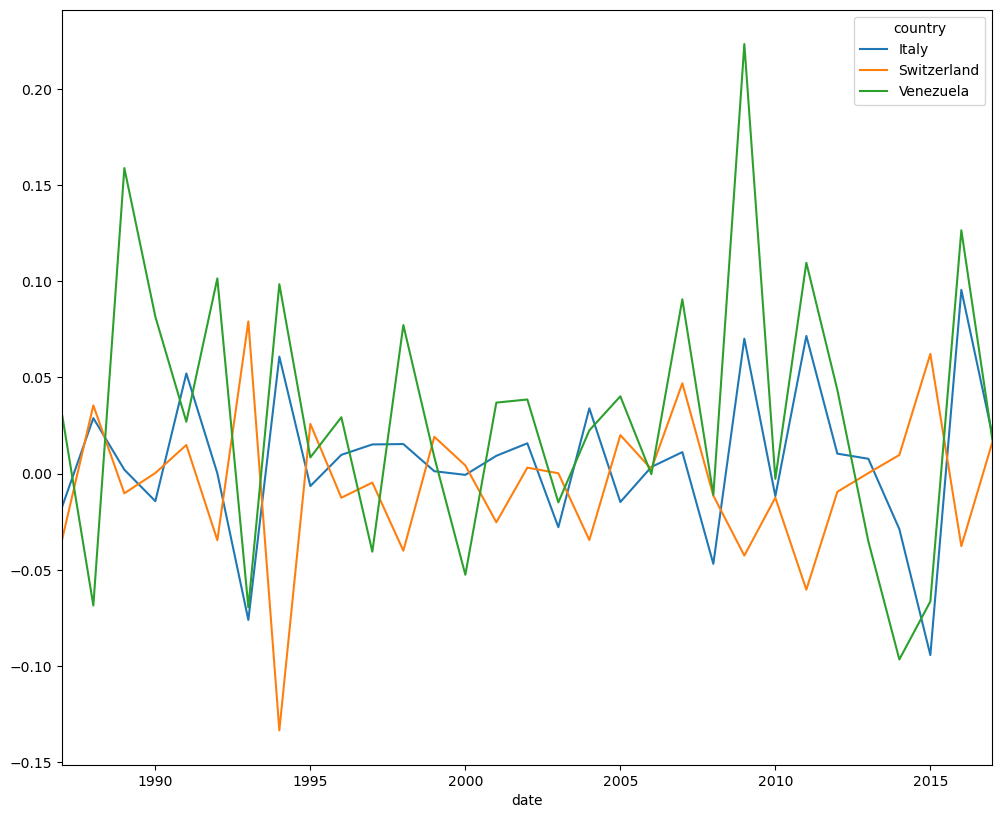

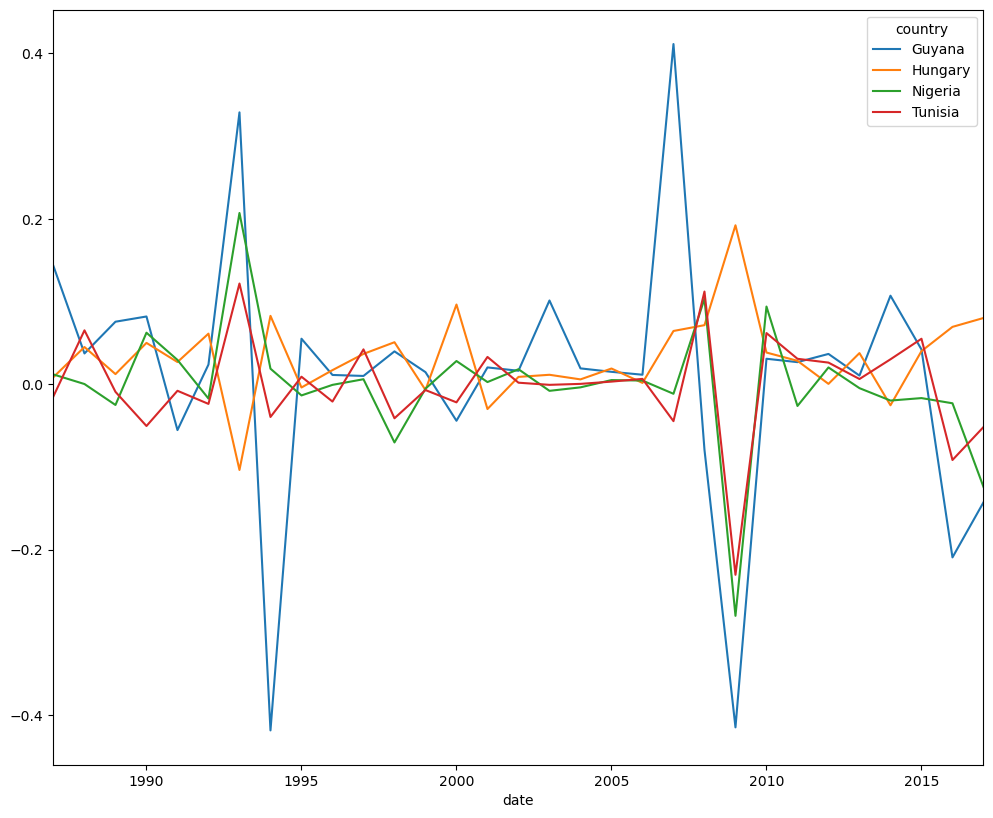

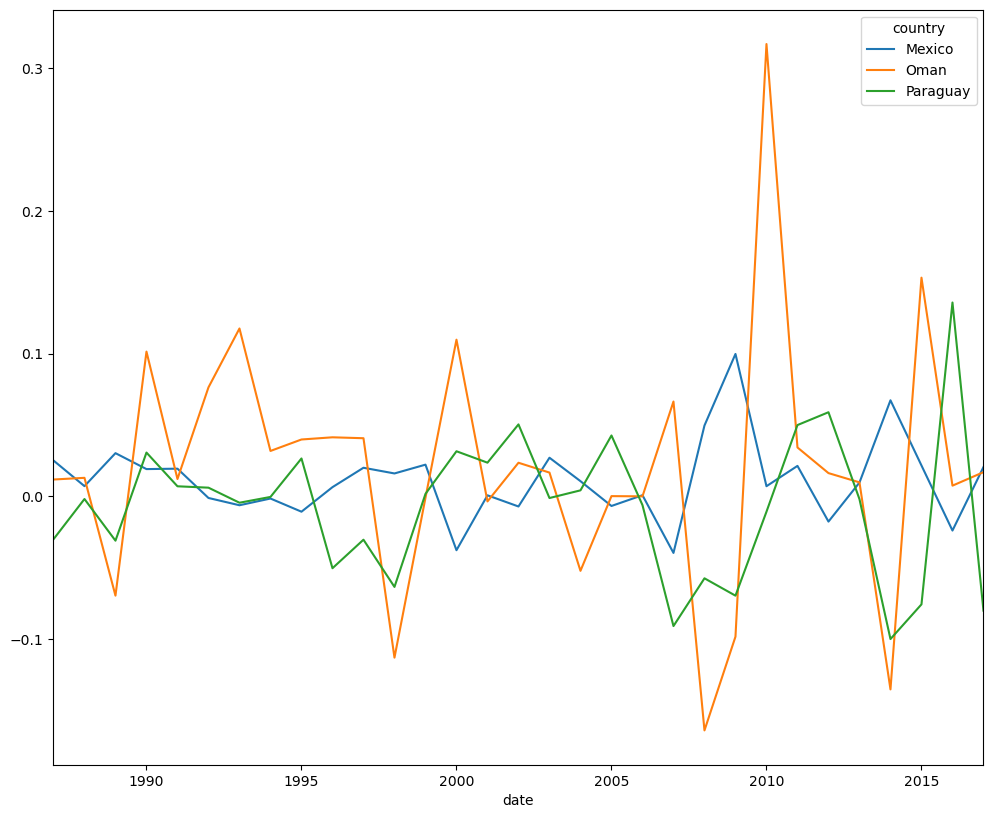

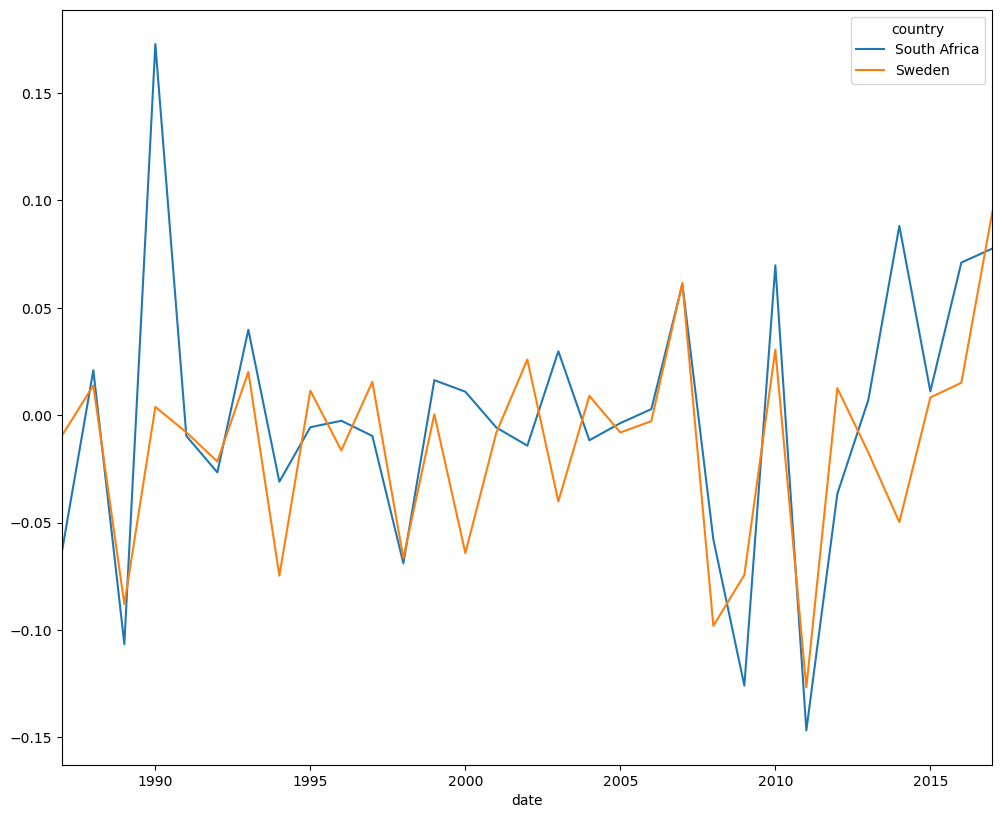

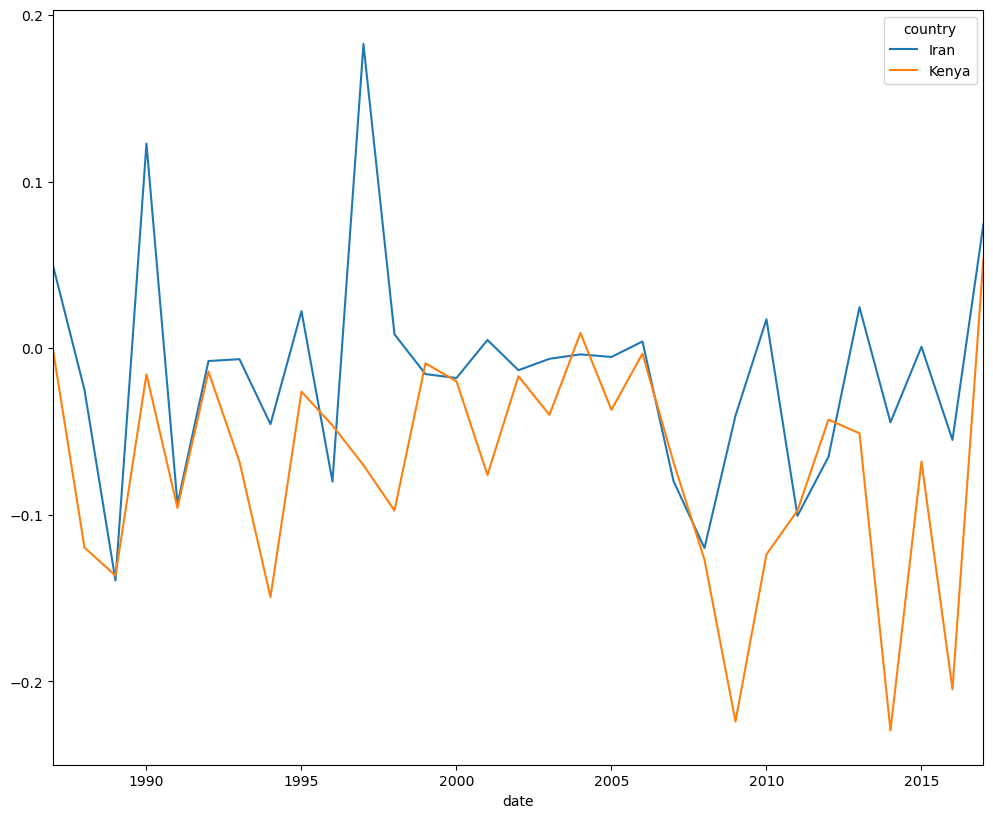

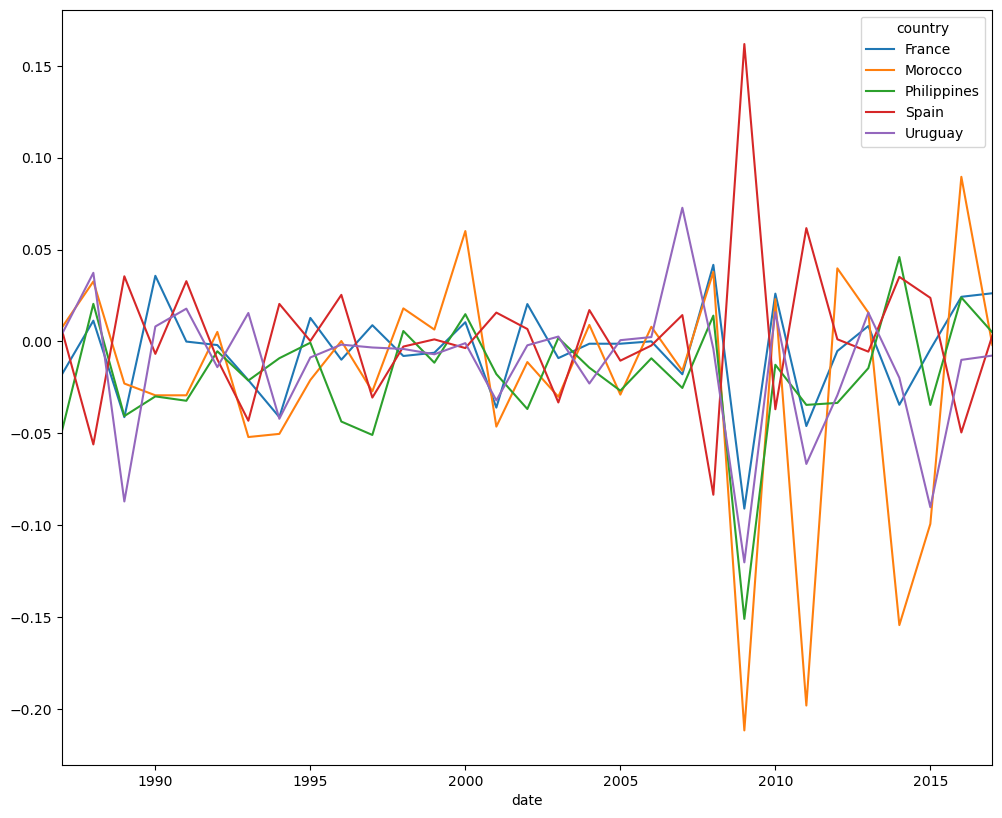

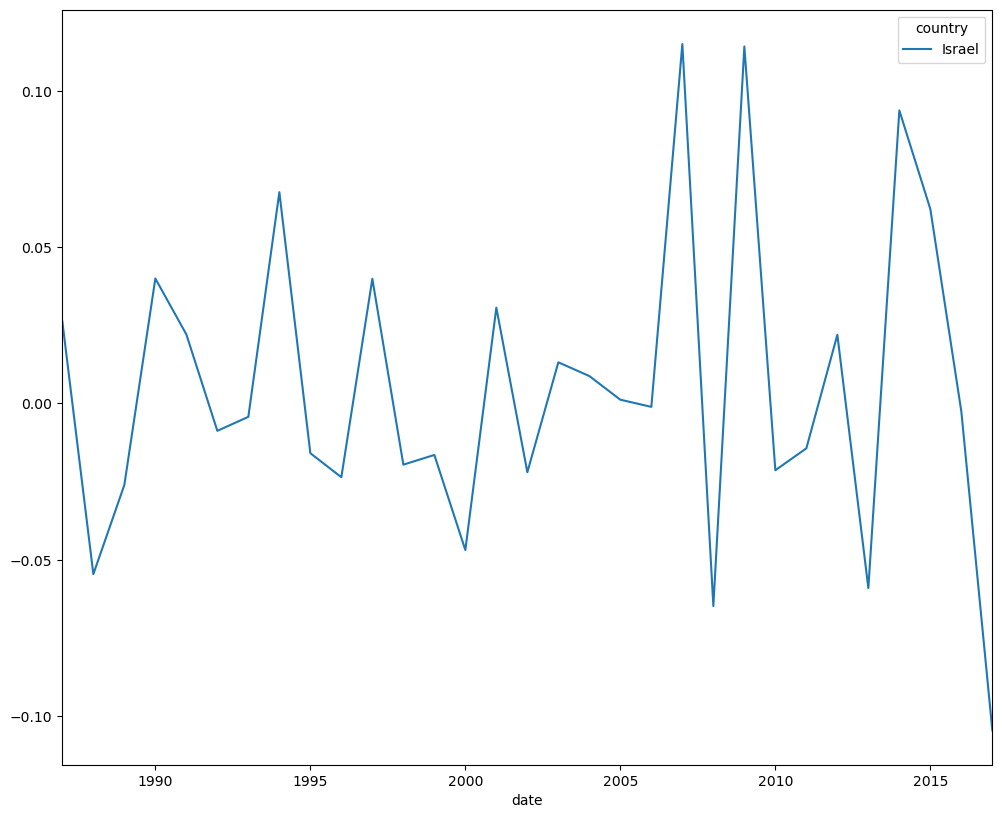

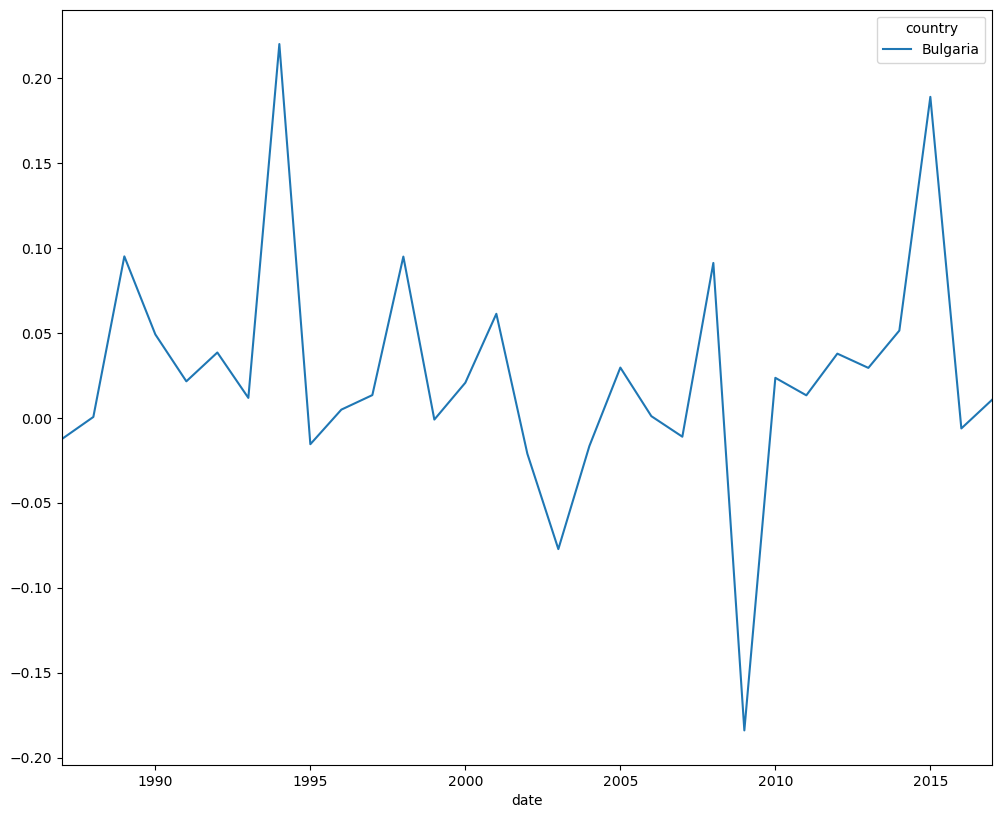

In [50]:
for yi in np.unique(clusters):
    mean_af_piv[af_expr_piv_clustered.cluster==yi].T.plot()